# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Data Processing 

In [2]:
data = pd.read_csv('World3.csv')
data.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
1,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2905195,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
2,Algeria,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,12902626.0,13275020.0,13663581.0,...,36661438,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0
3,American Samoa,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,24473.0,25235.0,25980.0,...,55755,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0
4,Andorra,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,20760.0,21886.0,...,83748,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0


In [3]:
data.shape

(217, 62)

In [4]:
data[data.isnull().any(axis=1)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
61,Eritrea,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,1178875.0,1210304.0,1242633.0,...,3213969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Kuwait,269026.0,300581.0,337346.0,378756.0,423900.0,472032.0,523169.0,577164.0,632911.0,...,3168054,3348852.0,3526382.0,3690939.0,3835588.0,3956862.0,4056102.0,4137314.0,4207077.0,4270563.0
213,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0


In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(214, 62)

In [7]:
data = data.drop(columns=['Country Name'])

# Model Fit and Predict

In [8]:
def build_model(train, modType):
    x = train.iloc[:, 0].values.reshape(-1,1)
    y = train.iloc[:, 1].values.reshape(-1,1)
    model = modType().fit(x,y)
    return model

def predict(model, year):
    return model.predict([[year]])[0][0]

# Predict World Population in 2122

## Method #1:
- Model the population growth of each country
- Predict the population of one country
- Sum the predictedtions

In [9]:
predLin1 = 0
for index in range(data.shape[0]):
    data_tuples = list(zip(data.columns.values,data.iloc[index, : ]))
    data_tuples
    
    tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])
    model = build_model(tempDf, LinearRegression)
    
    pred = predict(model, 2122)
    predLin1 = predLin1 + pred
    
np.floor(predLin1)

15874354113.0

# Method #2:
Create one model for the total population

In [10]:
data2 = pd.read_csv('totalPop.csv')
data2.head()

,Series Name,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Population, total",World,3032156070,3071596055,3124561005,3189655687,3255145692,3322046795,3392097729,3461619724,...,7003760440,7089254548,7175500378,7261846543,7347679005,7433569330,7519183459,7602454161,7683372259,7761620146


In [11]:
data2 = data2.drop(columns=['Series Name' ,'Country Name'])

In [12]:
data_tuples = list(zip(data2.columns.values,data2.iloc[0, : ]))
tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])

In [13]:
linReg = build_model(tempDf, LinearRegression)
    
predLin2 = predict(linReg, 2122)
np.floor(predLin2)

15953694673.0

In [14]:
np.abs(predLin1-predLin2)

79340559.72608376

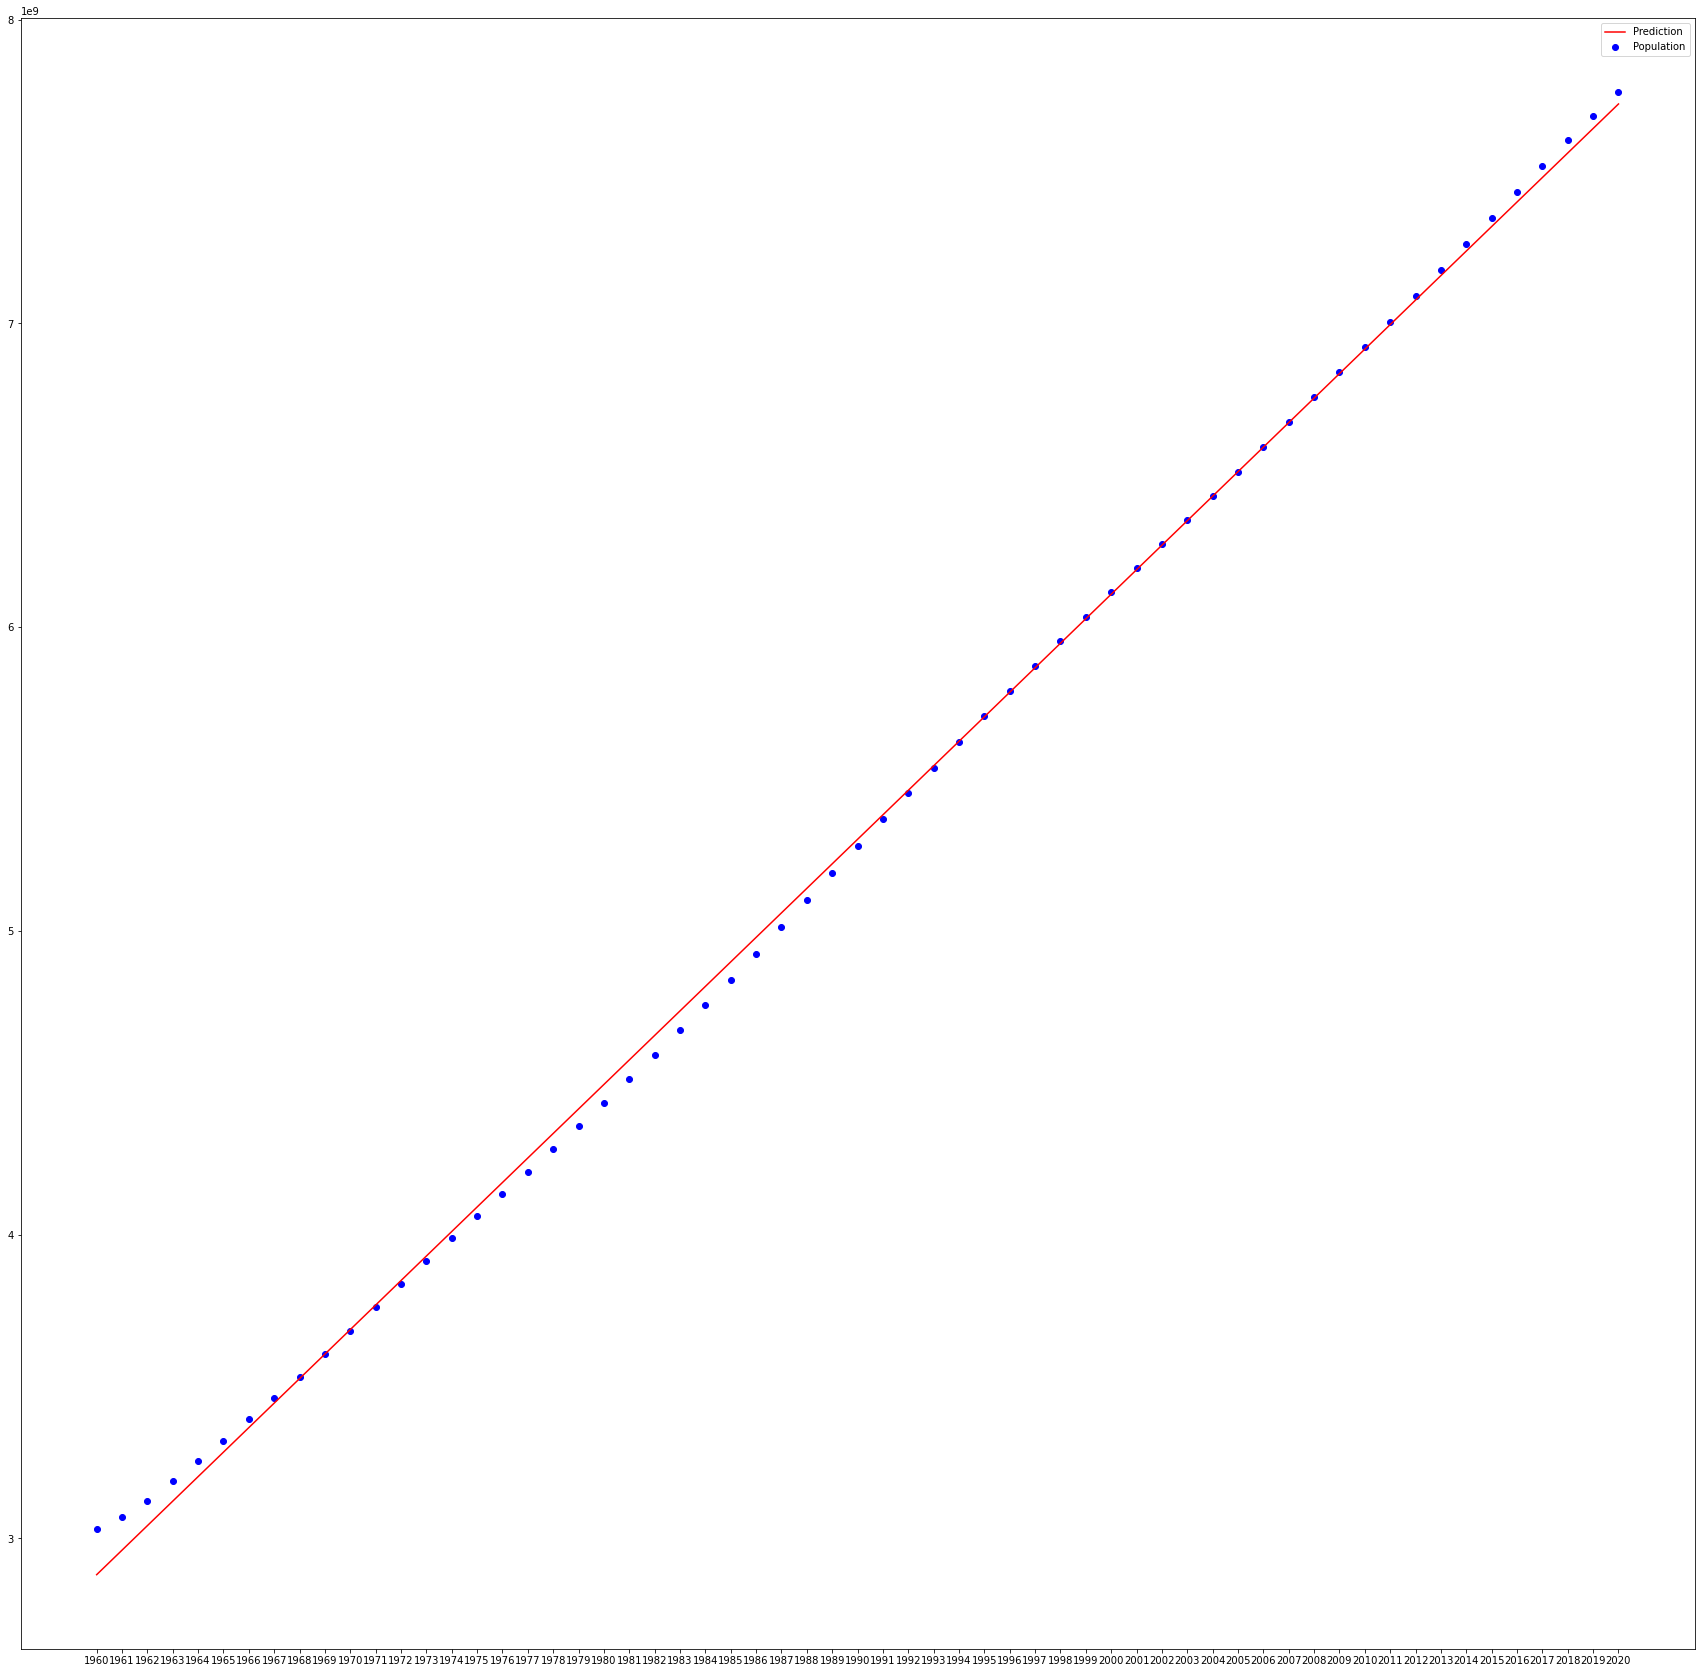

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

X = tempDf.iloc[:, 0].values
Y = tempDf.iloc[:, 1].values
x = tempDf.iloc[:, 0].values.reshape(-1,1)

plt.figure(figsize=(30, 30))

plt.scatter(X, Y, c='b')
plt.plot(X, linReg.predict(x) ,c='r')
plt.legend(['Prediction', 'Population',] )

plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y, linReg.predict(x), squared=False)
rms
print("RMSE of the linear regression model =", rms)

RMSE of the linear regression model = 41276568.06427081


# Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [20]:
x = tempDf.iloc[:, 0].values.reshape(-1,1)
y = tempDf.iloc[:, 1].values.reshape(-1,1)

ridge = Ridge(alpha=1.0)
# fit
ridge.fit(x, y)
# predict

predRidge1 = predict(ridge, 2122)

predRidge1

15953131404.865936

In [21]:
np.abs(predRidge1-predLin2)

563268.8140258789

In [22]:
rms2 = mean_squared_error(Y, ridge.predict(x), squared=False)
print("RMSE of the ridge regression model =", rms2)

RMSE of the ridge regression model = 41276636.44146911


In [120]:
predRidge2 = 0
for index in range(data.shape[0]):
    data_tuples = list(zip(data.columns.values,data.iloc[index, : ]))
    data_tuples
    
    tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])
    model = build_model(tempDf, Ridge)
    
    pred = predict(model, 2122)
    predRidge2 = predRidge2 + pred
    #print(pred)
predRidge2

15873793727.353664

In [121]:
np.abs(predRidge2-predLin1)

560386.6002140045

In [1]:
import tensorflow as tf

In [32]:
input_size=1
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(tempDf['Year'],tempDf['Population'],epochs=100,verbose=True)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 232989347087221508179956334592.0000
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: inf
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: inf
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: nan
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: nan
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: nan
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: nan
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: nan
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: nan
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: nan
Epoch 11/100
2/2 [==============================] - 0s 14ms/step - loss: nan
Epoch 12/100
2/2 [==============================] - 0s 14ms/step - loss: nan
Epoch 13/100
2/2 [==============================] - 0

In [28]:
models.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
tempDf["Year"] = np.int64(tempDf["Year"])

In [23]:
tempDf["Year"]

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
56    2016
57    2017
58    2018
59    2019
60    2020
Name: Year, Length: 61, dtype: int64